In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_style('white')

In [2]:
df = pd.read_csv('Lake_Bilancino.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


The Lake_Bilancio dataset consists of 6603 rows and 9 columms. All columns are in type float, except the **Date** column which is in object type. 

In [4]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace = True)

As earlier observed, the **Date** is in object type. The observations of the data shows that they were collected daily, making it time-series data. Hence, why the Data column has been converted and set as the index of the dataset.

In [5]:
df.head()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2002-03-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-04-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-05-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-07-06,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [6]:
print('Starting date is :' , df.index[0],
      '\nEnding Date is : ',df.index[-1])

Starting date is : 2002-03-06 00:00:00 
Ending Date is :  2020-06-30 00:00:00


In [7]:
df.shape

(6603, 8)

In [8]:
df.isna().sum()

Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                21
dtype: int64

<AxesSubplot:ylabel='Date'>

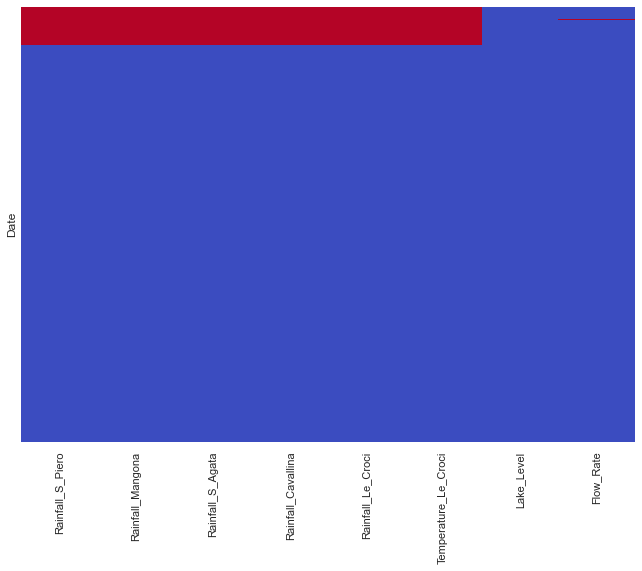

In [42]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")

The heatmap above describes the number of null values in the dataset. It can be deduced that most of the null values occur in the first few years of data entry. 

In [7]:
df.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6603.000000,6582.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,249.564091,2.760968
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.172558,4.073428
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.310000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,248.000000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.200000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.400000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


<AxesSubplot:>

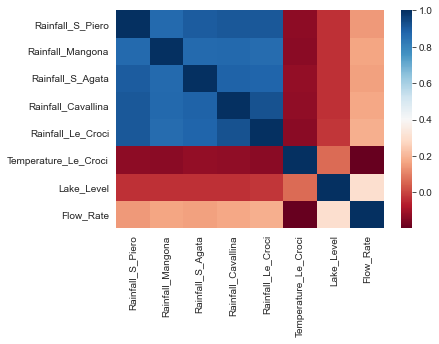

In [8]:
sns.heatmap(df.corr(), cmap = 'RdBu')

There is negative correlation between temperature and rainfall which is of course natural.

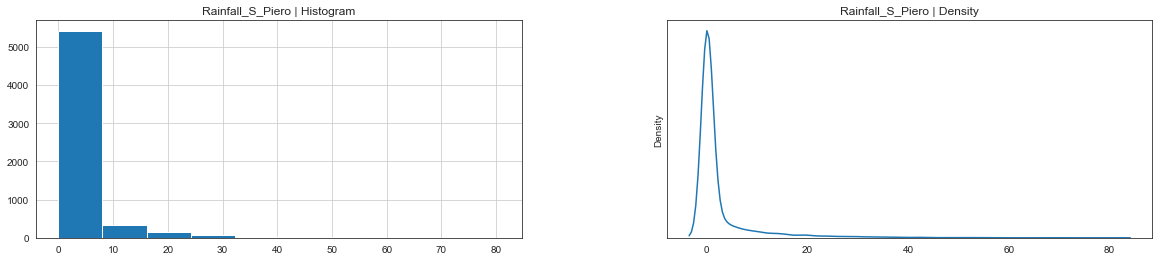

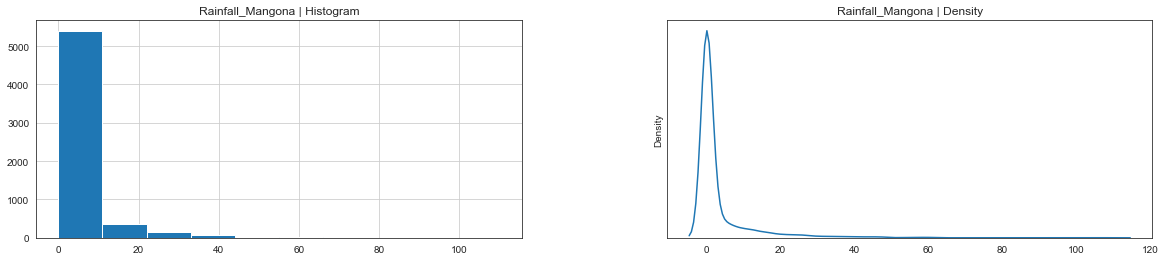

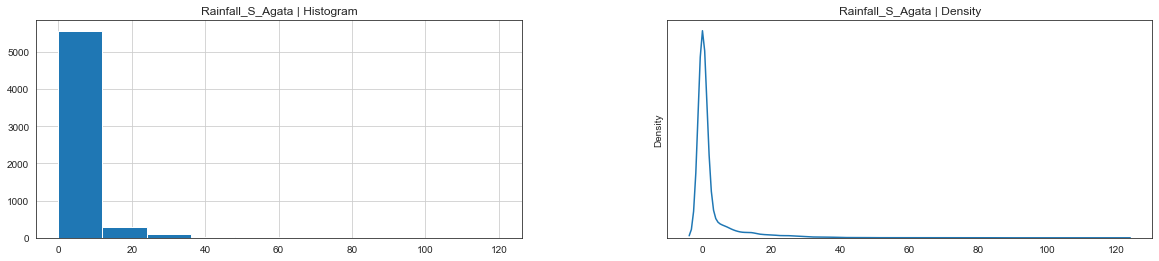

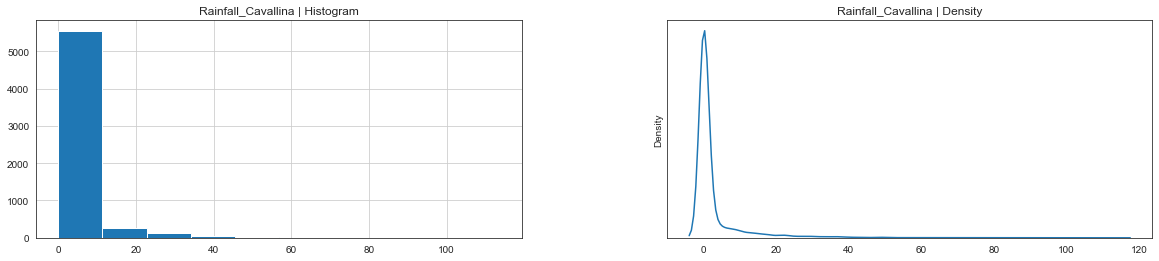

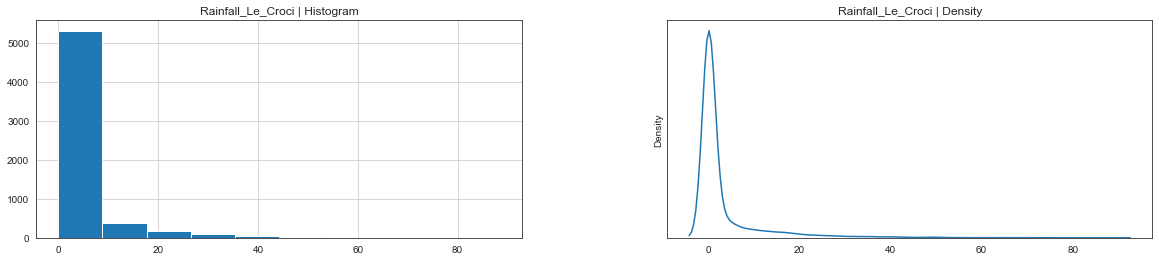

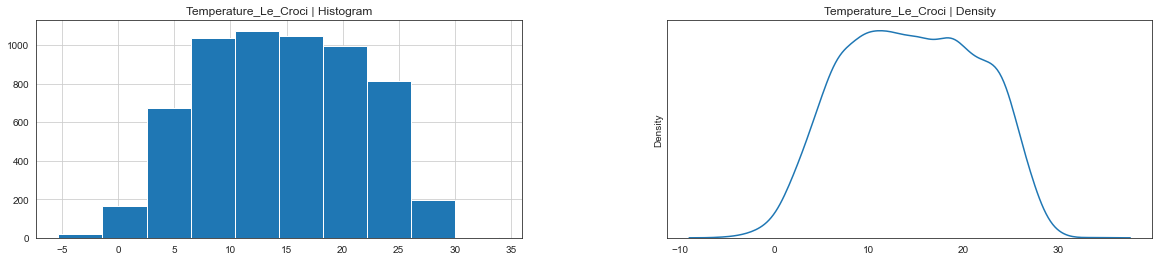

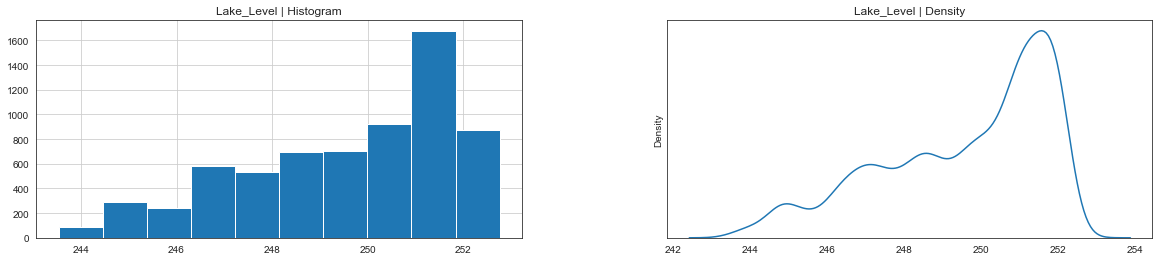

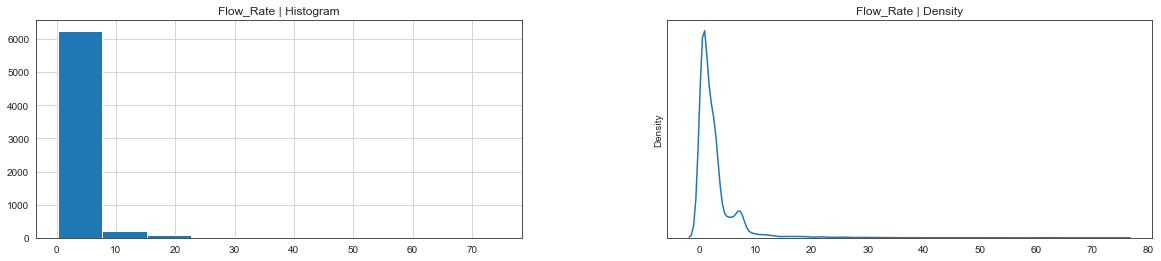

In [9]:
cols = ['Rainfall_S_Piero','Rainfall_Mangona','Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci','Temperature_Le_Croci','Lake_Level','Flow_Rate']
for i in cols:
    fig, axes = plt.subplots(1, 2, figsize = (20, 4))
    df.hist(str(i), bins = 10, ax=axes[0])
    try: 
        sns.kdeplot(np.array(df[str(i)]))
    except: ValueError
        
    axes[1].set_yticklabels([])
    axes[1].set_yticks([])
    axes[0].set_title(i + " | Histogram")
    axes[1].set_title(i + " | Density")
    plt.show()


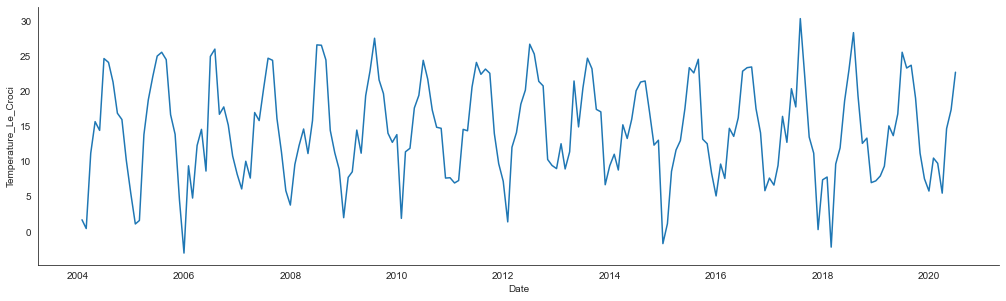

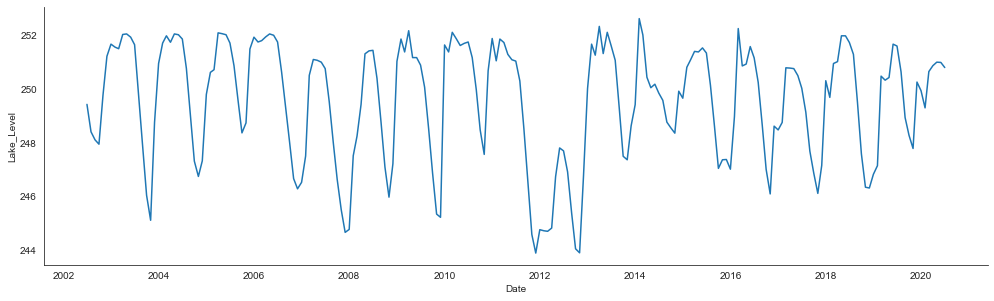

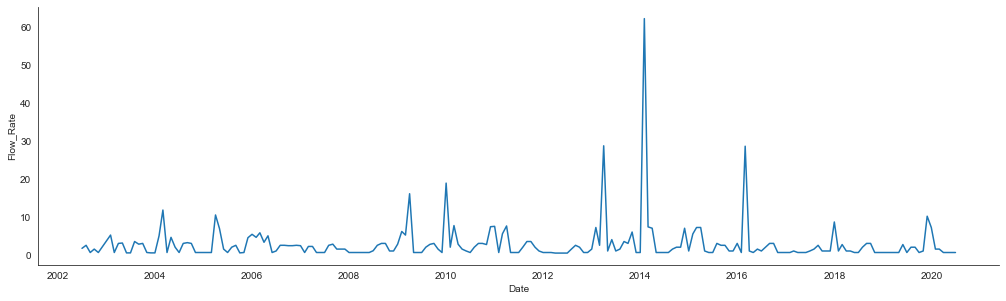

In [10]:
cols = ['Temperature_Le_Croci','Lake_Level','Flow_Rate']
for i in cols:
    df = df.asfreq('M')
    g = sns.relplot(data = df, x = df.index, y = df[str(i)], kind = 'line')
    g.fig.set_figwidth(15)
    g.fig.set_figheight(4)
    plt.show()

In [19]:
df_new = df[['Lake_Level', 'Flow_Rate', 'Temperature_Le_Croci']].reset_index()
df_new['rainfall'] = df.iloc[:, :-3].sum(axis = 1).values
df_new['year'] = pd.to_datetime(df.index).year
df_new['month'] = pd.to_datetime(df.index).month

# Monthly dynamics
df_new['month_year'] = pd.to_datetime(df.index).map(lambda x: x.strftime('%Y/%m'))

lake_means = np.log(df_new.groupby('month_year').Flow_Rate.mean()).reset_index()
lake_means['month_year'] = pd.to_datetime(lake_means['month_year'])

lake_means_LL = df_new.groupby('month_year').Lake_Level.mean().reset_index()
lake_means_LL['month_year'] = pd.to_datetime(lake_means_LL['month_year'])

lake_rain = np.log(df_new.groupby('month_year').rainfall.mean()).reset_index()
lake_rain['month_year'] = pd.to_datetime(lake_rain['month_year'])

lake_temp = np.log(df_new.groupby('month_year').Temperature_Le_Croci.mean()).reset_index()
lake_temp['month_year'] = pd.to_datetime(lake_temp['month_year'])

# df_new.head(12)

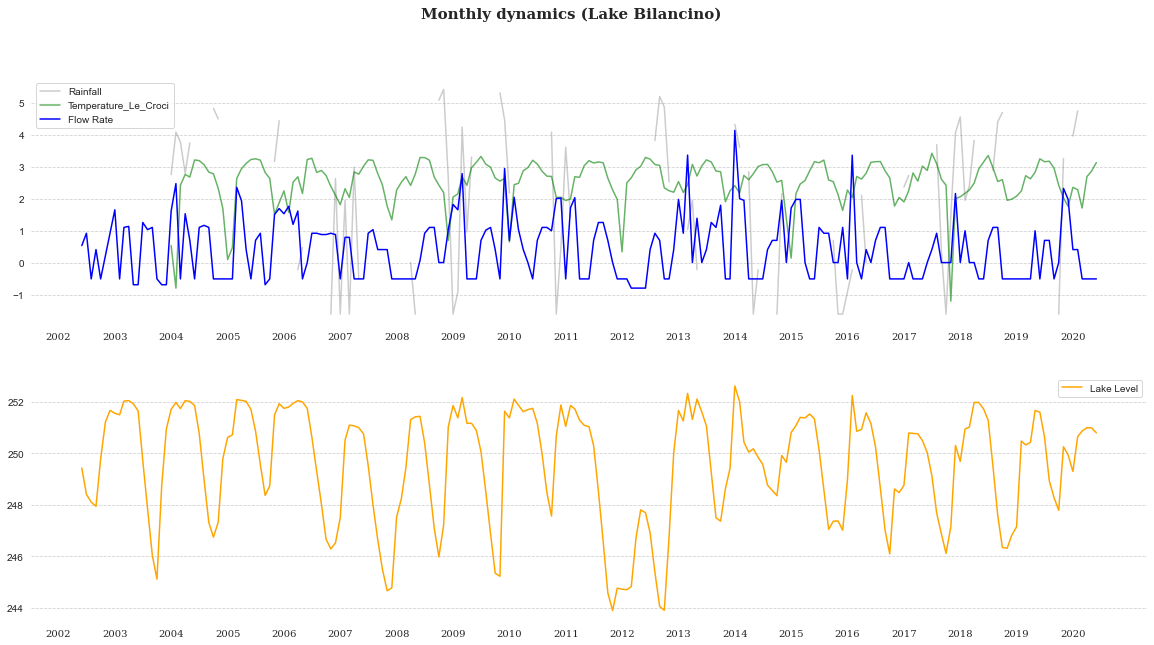

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 10))
plt.suptitle('Monthly dynamics (Lake Bilancino)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = lake_rain, x = 'month_year', y = 'rainfall', ax = ax1, 
             color = 'gray', label = 'Rainfall', alpha = 0.4)
sns.lineplot(data = lake_temp, x = 'month_year', y = 'Temperature_Le_Croci', ax = ax1,
             color = 'green', label = 'Temperature_Le_Croci', alpha = 0.6)
sns.lineplot(data = lake_means, x = 'month_year', y = 'Flow_Rate', ax = ax1,
             color = 'blue', label = 'Flow Rate')
    
for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(lake_means.month_year[::12])
ax1.set_xticklabels(range(2002, 2021, 1), fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)

sns.lineplot(data = lake_means_LL, x = 'month_year', y = 'Lake_Level', ax = ax2,
             color = 'orange', label = 'Lake Level')
    
for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(lake_means_LL.month_year[::12])
ax2.set_xticklabels(range(2002, 2021, 1), fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()

In [9]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('Lake_Bilancino.csv', header=0, index_col=0, squeeze=True)
X = series['Lake_Level'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.880991
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [10]:
df1 = df.copy()
df1 = df1.dropna()
print(df1.shape)

(6025, 8)


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from functools import reduce

In [12]:
# split data
#Create split data function for reusability
def split_data(data, target):
    # create targets and features dataset
    x = data.drop(['Lake_Level', 'Flow_Rate'], axis=1)
    y = data[target]
    # Use train test split function to split data into train and test
    x_train,x_test, y_train,y_test = train_test_split(x, y, random_state = 42 ,test_size = 0.2)
    #scaling the x-train only
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    
    return x_train, x_test, y_train, y_test

In [43]:
def evaluate_model(x, y, linear,forest,decision, set_ = 'Set1'):
    # evaluate models on train set
    pred_linear = linear.predict(x)
    pred_forest = forest.predict(x)
    pred_tree = decision.predict(x)
    rmse_lin = round(np.sqrt(mean_squared_error(y, pred_linear)),2)
    rmse_forest = round(np.sqrt(mean_squared_error(y, pred_forest)),2)
    rmse_tree = round(np.sqrt(mean_squared_error(y, pred_tree)),2)
    mse_linear = round(mean_squared_error(y, pred_linear),2)
    mse_forest = round(mean_squared_error(y, pred_forest),2)
    mse_tree = round(mean_squared_error(y, pred_tree),2)
   
    train_scores = pd.DataFrame({'Models':['Linear Model','Random Forest','Decision Tree'],
                                 'RMSE_{}'.format(set_): [rmse_lin,rmse_forest,rmse_tree],
                                 'MSE_{}'.format(set_): [mse_linear,mse_forest,mse_tree]})
    train_scores = train_scores.sort_values(by = 'RMSE_{}'.format(set_))

    
    return train_scores

In [14]:
x_train1, x_test1, y_train1, y_test1 = split_data(df1, 'Lake_Level')

In [15]:
# Create Linear Model Object
linear_model1 = LinearRegression()
# fit model to train data
linear_model1.fit(x_train1,y_train1)

LinearRegression()

In [16]:
# Create Random forest Model Object
forest_model1 = RandomForestRegressor(n_estimators = 100, random_state = 42)
# fit model to train data
forest_model1.fit(x_train1,y_train1)

RandomForestRegressor(random_state=42)

In [17]:
tree_model1 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_model1.fit(x_train1,y_train1)

DecisionTreeRegressor(max_depth=2, random_state=42)

#### Modelling on Second Target

In [18]:
x_train2, x_test2, y_train2, y_test2 = split_data(df1, 'Flow_Rate')

In [19]:
# Create Linear Model Object
linear_model2 = LinearRegression()
# fit model to train data
linear_model2.fit(x_train2,y_train2)

LinearRegression()

In [20]:
forest_model2 = RandomForestRegressor(n_estimators = 100, random_state = 42)
forest_model2.fit(x_train2, y_train2)

RandomForestRegressor(random_state=42)

In [21]:
tree_model2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_model2.fit(x_train2, y_train2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [49]:
target1 = evaluate_model(x_train1, y_train1, linear_model1, forest_model1, tree_model1, set_ = 'Lake_Level') # Train Model Target 1 
target2 = evaluate_model(x_train2, y_train2, linear_model2, forest_model2, tree_model2, set_ = 'Flow_Rate') # Train Model Target 2

### Train and Test Model Performance

In [50]:
merge_train = reduce(lambda  left,right: pd.merge(left,
                   right, on = 'Models',
                    how='inner'), [target1, target2])

In [51]:
rmse = merge_train[['Models','RMSE_Lake_Level', 'RMSE_Flow_Rate']]
rmse

,Models,RMSE_Lake_Level,RMSE_Flow_Rate
0,Random Forest,1.43,1.92
1,Decision Tree,2.15,3.52
2,Linear Model,2.16,3.61


In [53]:
mse = merge_train[['Models','MSE_Lake_Level','MSE_Flow_Rate']]
mse

,Models,MSE_Lake_Level,MSE_Flow_Rate
0,Random Forest,2.05,3.70
1,Decision Tree,4.61,12.42
2,Linear Model,4.66,13.07


In [54]:
target1_test = evaluate_model(x_test1, y_test1, linear_model1, forest_model1, tree_model1, set_='Lake_Level_test') # Test Model Data Set 1
target2_test = evaluate_model(x_test2, y_test2, linear_model2, forest_model2, tree_model2, set_='Flow_Rate_test') # Test Model Data Set 2

In [55]:
merge_test = reduce(lambda  left,right: pd.merge(left,
                   right, on = 'Models',
                    how='inner'), [target1_test, target2_test])

In [58]:
#Display only the rmse scores from all models 
rmse = merge_test[['Models','RMSE_Lake_Level_test','RMSE_Flow_Rate_test']]
rmse

,Models,RMSE_Lake_Level_test,RMSE_Flow_Rate_test
0,Random Forest,2.25,5.52
1,Decision Tree,2.36,5.88
2,Linear Model,3.38,11.49


In [61]:
#Display only the rmse scores from all models 
mse_test = merge_test[['Models','MSE_Lake_Level_test','MSE_Flow_Rate_test']]
mse_test

,Models,MSE_Lake_Level_test,MSE_Flow_Rate_test
0,Random Forest,5.08,30.51
1,Decision Tree,5.55,34.56
2,Linear Model,11.41,132.06


In [ ]:
# Use the feature importances method to get the feature weightings from model object
importances = forest_model.feature_importances_
# Store the training features names in a list variable to map each feature to its importance
train_features = list(x_train4.columns)
# Create a dataframe of features and importance
feature_importance = pd.DataFrame({'Features':train_features,
                                  'Importance Weightings':importances})
# Sort the feature importances in descending order
feature_importance = feature_importance.sort_values(by = ['Importance Weightings'], ascending = False)

In [ ]:
plt.figure(figsize=(13,7))
x = feature_importance['Features'] # Select features for x_axis
y = feature_importance['Importance Weightings'] # Select features for y_axis
plt.bar(x, y, color = 'blue') #Plot the bar chart
plt.xticks(rotation=90, size = 20)
plt.yticks(size=15)
# Set x and y axis titles
plt.ylabel('Importance', size =20, labelpad=10)
plt.xlabel('Features', size=20, labelpad=10) # Note: '\n' creates a newline (try removing it and see what happens)  

# Set graph title
plt.title('Feature Importance for Random Forest Model', size=20, pad=15)

# Show graph
plt.show()